# 1. IMPLEMENT K-NN ALGORITHMS FOR PERFORMING CLASSIFICATION TASK USING WINE QUALITY DATASET USING SKLEARN LIBRARY.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Reading Data
df = pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#categorize wine quality
bins = (2,6,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

In [6]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [7]:
#splitting data to X & y
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [8]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                random_state = 0)

In [10]:
# Feature Scaling to X_train and X_test to classify better.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

    
    

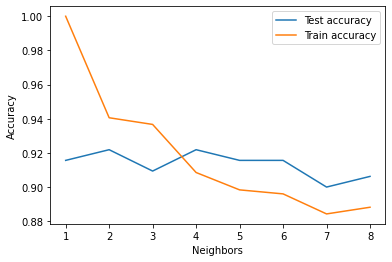

In [12]:
# Fitting knn classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
#loop over k values
for i,k in enumerate(neighbors):
    Knn = KNeighborsClassifier (n_neighbors=k)
    Knn.fit(X_train,y_train)
    train_accuracy[i] = Knn.score(X_train,y_train)
    test_accuracy[i] = Knn.score(X_test,y_test)
#Generate plot
plt.plot(neighbors,test_accuracy,label='Test accuracy')
plt.plot(neighbors,train_accuracy,label='Train accuracy') 

plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [13]:
#Training the knn model for k=1 as inferred from the above plot
Knn_1 = KNeighborsClassifier (n_neighbors=1)
Knn_1.fit(X_train,y_train)
#Predicting the Test Set
y_pred_1=Knn_1.predict(X_test)

In [14]:
#Evaluating the model using various metrics
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion matrix : ')
print(confusion_matrix(y_test, y_pred_1))
print()
print(classification_report(y_test, y_pred_1))
print()

from sklearn.metrics import roc_auc_score
print('AUC Score = ',roc_auc_score(y_test, y_pred_1))

Confusion matrix : 
[[270  20]
 [  7  23]]

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.53      0.77      0.63        30

    accuracy                           0.92       320
   macro avg       0.75      0.85      0.79       320
weighted avg       0.93      0.92      0.92       320


AUC Score =  0.8488505747126436
